id                             1
submitter           _sindulgence
subreddit             Femdomfeet
title        you know what to do
y                            101
unix_time           1656158222.0
ds           2022-06-25 11:57:02
Name: 0, dtype: object


14:29:54 - cmdstanpy - INFO - Chain [1] start processing
14:29:55 - cmdstanpy - INFO - Chain [1] done processing


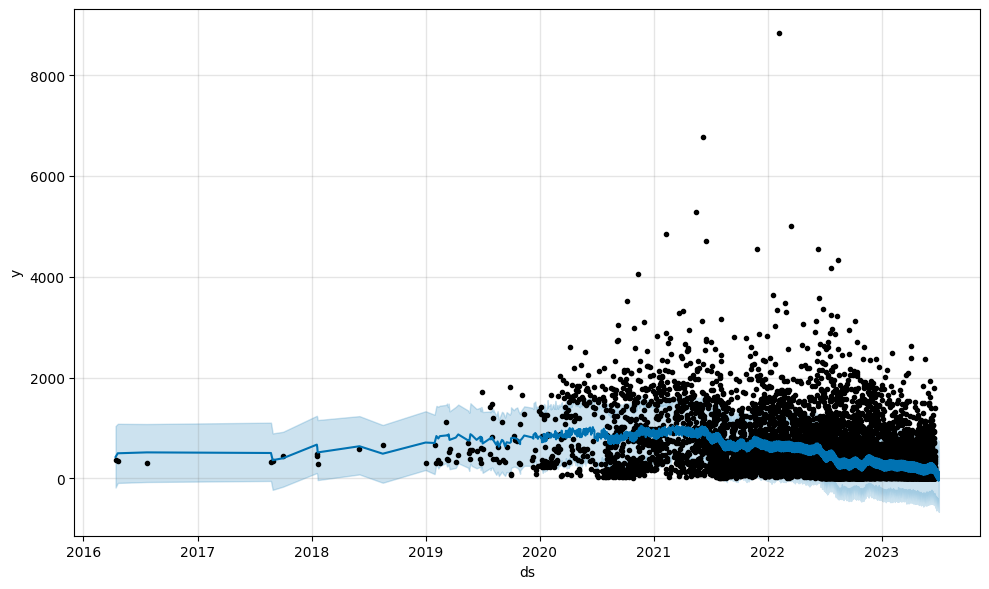

In [1]:

# db reddit; table posts; id:integer, submitter:text, subreddit:text, title:text, unix_time:double precision, upvotes:integer

import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import get_posts_from_db as db

df = db.get_posts_from_db()

# Prophet
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
forecast = m.predict(future)
fig1 = m.plot(forecast).savefig('prophet_forecast.png')
plot_plotly(m, forecast)